In [187]:
# -*- coding: utf8 -*-
import codecs
import features
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import pickle
import math

In [2]:
import datetime
def dateheure():
    return datetime.datetime.utcnow().strftime('%y%m%d%H%M')

typeEchantillon : 
- fixe pour utiliser tailleEchantillon
- variable pour utiliser nombre,increment
- total pour utiliser tout le lexique

In [149]:
filePrefix="MGC-151206"
lexiquePrefix="MGC-150815"
exportName="MGC-151208-MoyennesFormes.csv"

In [127]:
rangsEchantillons=5
nombreEchantillons=20
echantillonPrefix="-extend"

##Importations
- codecs pour les encodages
- pandas et numpy pour les calculs sur tableaux
- matplotlib pour les graphiques
- itertools pour les itérateurs sophistiqués (paires sur liste, ...)

In [5]:
#%pylab inline
#pd.options.display.mpl_style = 'default'
debug=False

In [6]:
bdlexiqueIn = unicode(u"èò")
bdlexiqueNum = [ord(char) for char in bdlexiqueIn]
neutreOut = unicode(u"EO")
neutralise = dict(zip(bdlexiqueNum, neutreOut))

In [7]:
def recoder(chaine,table=neutralise):
    if type(chaine)==str:
        temp=unicode(chaine.decode('utf8')).translate(table)
        result=temp.encode('utf8')
    elif type(chaine)==unicode:
        result=chaine.translate(table)
    return result

###Définition des cases
- principales pour le paradigme courant
- secondaires pour les cases rares
- totales pour le tout

In [8]:
casesPrincipales= [
        'inf', 'pi1S', 'pi2S', 'pi3S', 'pi1P', 'pi2P', 'pi3P', 'ii1S',
        'ii2S', 'ii3S', 'ii1P', 'ii2P', 'ii3P', 
        'fi1S', 'fi2S', 'fi3S', 'fi1P', 'fi2P',
        'fi3P', 'pI2S', 'pI1P', 'pI2P', 'ps1S', 'ps2S', 'ps3S', 'ps1P',
        'ps2P', 'ps3P', 
        'pc1S', 'pc2S', 'pc3S', 'pc1P', 'pc2P', 'pc3P', 'pP',
        'ppMS', 'ppMP', 'ppFS', 'ppFP'
            ]
casesSecondaires= [
       'ai1S', 'ai2S', 'ai3S', 'ai1P', 'ai2P', 'ai3P', 'is1S', 'is2S', 'is3S', 'is1P', 'is2P', 'is3P'
            ]
casesTotales=casesPrincipales+casesSecondaires
listeCases=casesTotales

In [9]:
with open("2015-Data/"+lexiquePrefix+'-Verbes.pkl', 'rb') as input:
    verbes = pickle.load(input)

In [10]:
verbes["phono"]=verbes["phono"].apply(lambda x: recoder(x))

In [119]:
lexemesFreqs=verbes.groupby("lexeme",as_index=False)[["freq","prob"]].mean()

In [212]:
lexemesFreqs["logProb"]=np.log(lexemesFreqs["prob"])

In [130]:
for rangEchantillon in range(rangsEchantillons):
    dictEchantillons[rangEchantillon]={}
    for numEchantillon in range(nombreEchantillons):
        dictEchantillons[rangEchantillon][numEchantillon]=pd.read_csv("2015-Data/"+filePrefix+echantillonPrefix+"-%02d"%numEchantillon+"-%02d"%(rangEchantillon+1)+"-paradigmes.csv",sep=";",encoding="utf8")
        dictEchantillons[rangEchantillon][numEchantillon]["nbFormes-%02d"%numEchantillon]=50-dictEchantillons[rangEchantillon][numEchantillon].isnull().sum(axis=1)

In [242]:
for element in dictEchantillons[0][0][dictEchantillons[0][0]["lexeme"]=="acclamer"]:
    print dictEchantillons[0][0][dictEchantillons[0][0]["lexeme"]=="acclamer"][element],
dictEchantillons[0][0][dictEchantillons[0][0]["nbFormes-00"]==1]

25    25
Name: Unnamed: 0, dtype: int64 25    acclamer
Name: lexeme, dtype: object 25    NaN
Name: ai1P, dtype: object 25    NaN
Name: ai1S, dtype: object 25    NaN
Name: ai2P, dtype: object 25    NaN
Name: ai2S, dtype: object 25    NaN
Name: ai3P, dtype: object 25    NaN
Name: ai3S, dtype: object 25    NaN
Name: fi1P, dtype: object 25    NaN
Name: fi1S, dtype: object 25    NaN
Name: fi2P, dtype: object 25    NaN
Name: fi2S, dtype: object 25    NaN
Name: fi3P, dtype: object 25    NaN
Name: fi3S, dtype: object 25    NaN
Name: ii1P, dtype: object 25    NaN
Name: ii1S, dtype: object 25    NaN
Name: ii2P, dtype: object 25    NaN
Name: ii2S, dtype: object 25    NaN
Name: ii3P, dtype: object 25    NaN
Name: ii3S, dtype: object 25    NaN
Name: inf, dtype: object 25    NaN
Name: is1P, dtype: object 25    NaN
Name: is1S, dtype: object 25    NaN
Name: is2S, dtype: object 25    NaN
Name: is3P, dtype: object 25    NaN
Name: is3S, dtype: object 25    NaN
Name: pI1P, dtype: object 25    NaN
Name: pI

,Unnamed: 0,lexeme,ai1P,ai1S,ai2P,ai2S,ai3P,ai3S,fi1P,fi1S,...,ppFS,ppMP,ppMS,ps1P,ps1S,ps2P,ps2S,ps3P,ps3S,nbFormes-00
6,6,abonder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,7,abonner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,abOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,9,aboucher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13,13,abrutir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,abryti,NaN,NaN,NaN,NaN,NaN,NaN,1
18,18,abstenir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22,22,accaparer,NaN,NaN,NaN,NaN,NaN,akapara,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
25,25,acclamer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
26,26,acclimater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,aklimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
31,31,accoster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
39,39,accréditer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [138]:
nombreFormes={}
for rangEchantillon in range(rangsEchantillons):
    nombreFormes[rangEchantillon]=dictEchantillons[rangEchantillon][0][["lexeme","nbFormes-00"]]

In [139]:
for rangEchantillon in range(rangsEchantillons):
    for numEchantillon in range(1,nombreEchantillons):
    #    print numEchantillon
        nombreFormes[rangEchantillon]=pd.merge(
            nombreFormes[rangEchantillon],
            dictEchantillons[rangEchantillon][numEchantillon][["lexeme","nbFormes-%02d"%numEchantillon]],
            how="outer",
            on="lexeme")

In [140]:
for rangEchantillon in range(rangsEchantillons):
    nombreFormes[rangEchantillon]["moyenne-%02d"%rangEchantillon]=nombreFormes[rangEchantillon].sum(axis=1)/20

In [142]:
for rangEchantillon in range(rangsEchantillons):
    nombreFormes[rangEchantillon]["std-%02d"%rangEchantillon]=nombreFormes[rangEchantillon].std(axis=1)

In [213]:
moyenneFormes=nombreFormes[0][["lexeme","moyenne-00","std-00"]]
moyenneFormes

,lexeme,moyenne-00,std-00
0,abaisser,5.20,1.846875
1,abandonner,20.20,2.135416
2,abattre,10.80,1.939072
3,abdiquer,1.40,1.240235
4,abjurer,1.65,1.466648
5,abolir,2.95,1.165567
6,abonder,2.30,1.226305
7,abonner,0.90,0.796013
8,aborder,7.95,1.802082
9,aboucher,0.25,0.622495


In [214]:
for rangEchantillon in range(1,rangsEchantillons):
    moyenneFormes=pd.merge(
        moyenneFormes,
        nombreFormes[rangEchantillon][["lexeme","moyenne-%02d"%rangEchantillon,"std-%02d"%rangEchantillon]],
        how="inner",
        on="lexeme"
    )

In [215]:
moyenneFormes=pd.merge(moyenneFormes,lexemesFreqs[["lexeme","logProb"]],how="left")

In [201]:
#moyenneFormes["logProb"]=np.log(moyenneFormes["prob"])
#nombreFormes

In [150]:
moyenneFormes.to_csv(exportName, sep='\t', encoding='utf-8')

In [197]:
#tab0=moyenneFormes[["lexeme","moyenne-00","prob"]].sort_values(by="prob",ascending=False).reset_index()
tab0=moyenneFormes[["lexeme","moyenne-00","prob"]].sort_values(by="prob",ascending=False)
tab0["prob"]

2845    1.828206e-03
682     9.495843e-04
1193    8.514909e-04
255     7.642672e-04
117     7.087324e-04
1194    5.797053e-04
1886    4.114658e-04
2707    3.986681e-04
2377    3.710616e-04
2699    3.342995e-04
671     2.698019e-04
107     2.638352e-04
2677    2.568253e-04
1770    2.206290e-04
2112    2.135472e-04
1795    2.131041e-04
1777    2.080875e-04
2477    2.028054e-04
622     2.026125e-04
1888    1.964724e-04
1538    1.859276e-04
187     1.772111e-04
713     1.662301e-04
2639    1.598894e-04
157     1.572537e-04
655     1.491823e-04
191     1.407762e-04
229     1.285321e-04
2204    1.249932e-04
1631    1.144943e-04
            ...     
4532    2.546460e-09
3739    2.546460e-09
3172    2.546460e-09
4286    2.546460e-09
4325    2.546460e-09
4660    2.546460e-09
3672    2.546460e-09
4507    2.546460e-09
4227    2.546460e-09
4430    2.546460e-09
3378    2.546460e-09
4383    2.546460e-09
2850    2.546460e-09
4538    2.546460e-09
4015    2.546460e-09
4587    2.546460e-09
4552    2.546

In [198]:
tab0["logProb"]=np.log(tab0["prob"])

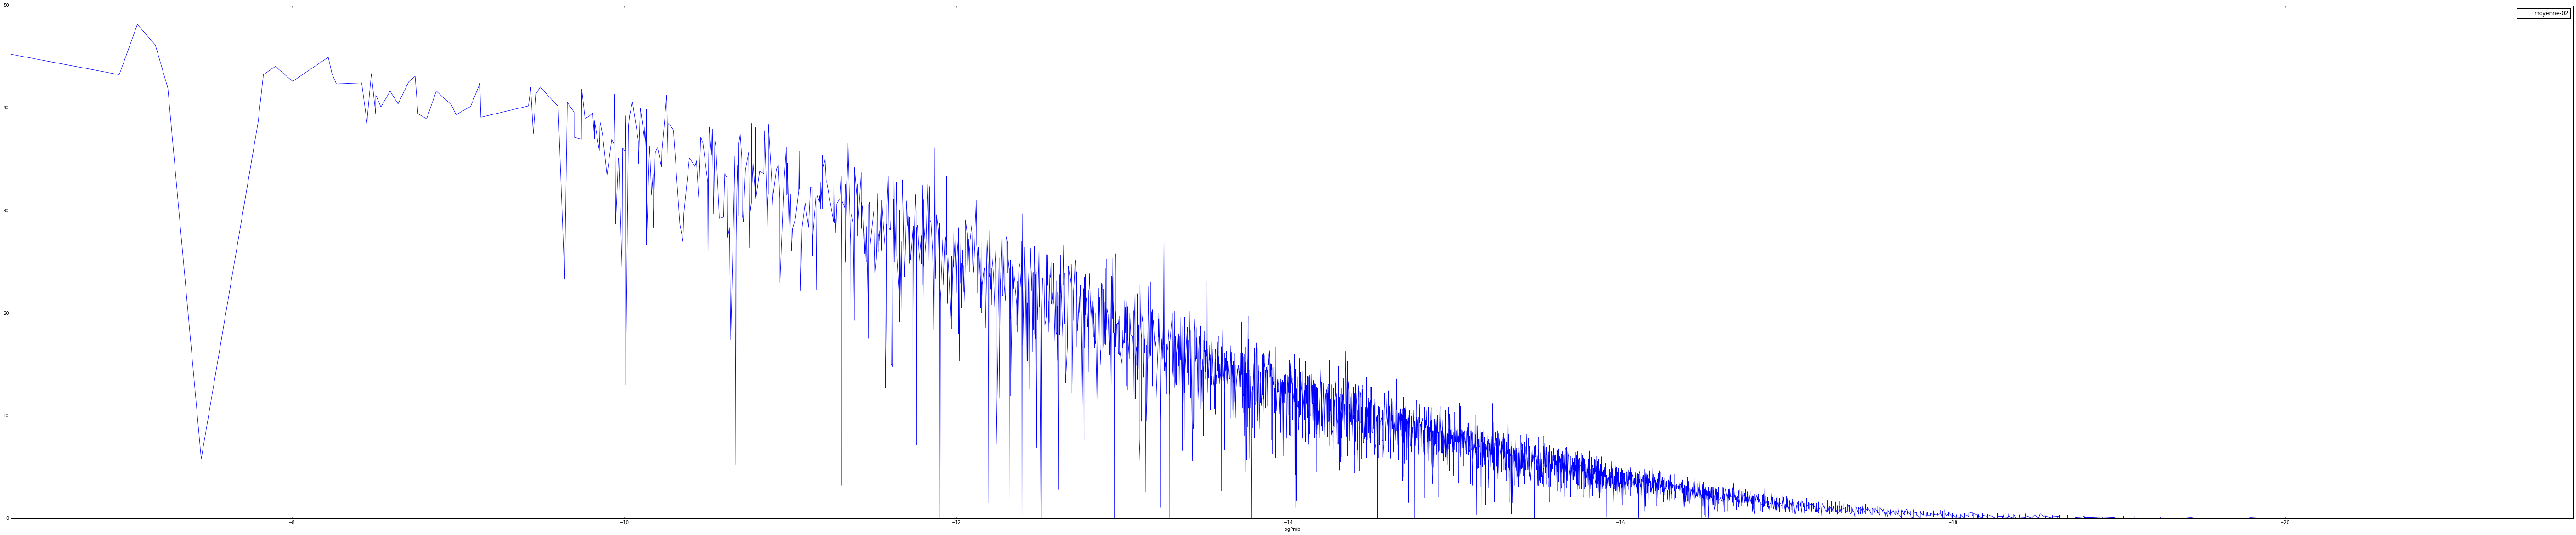

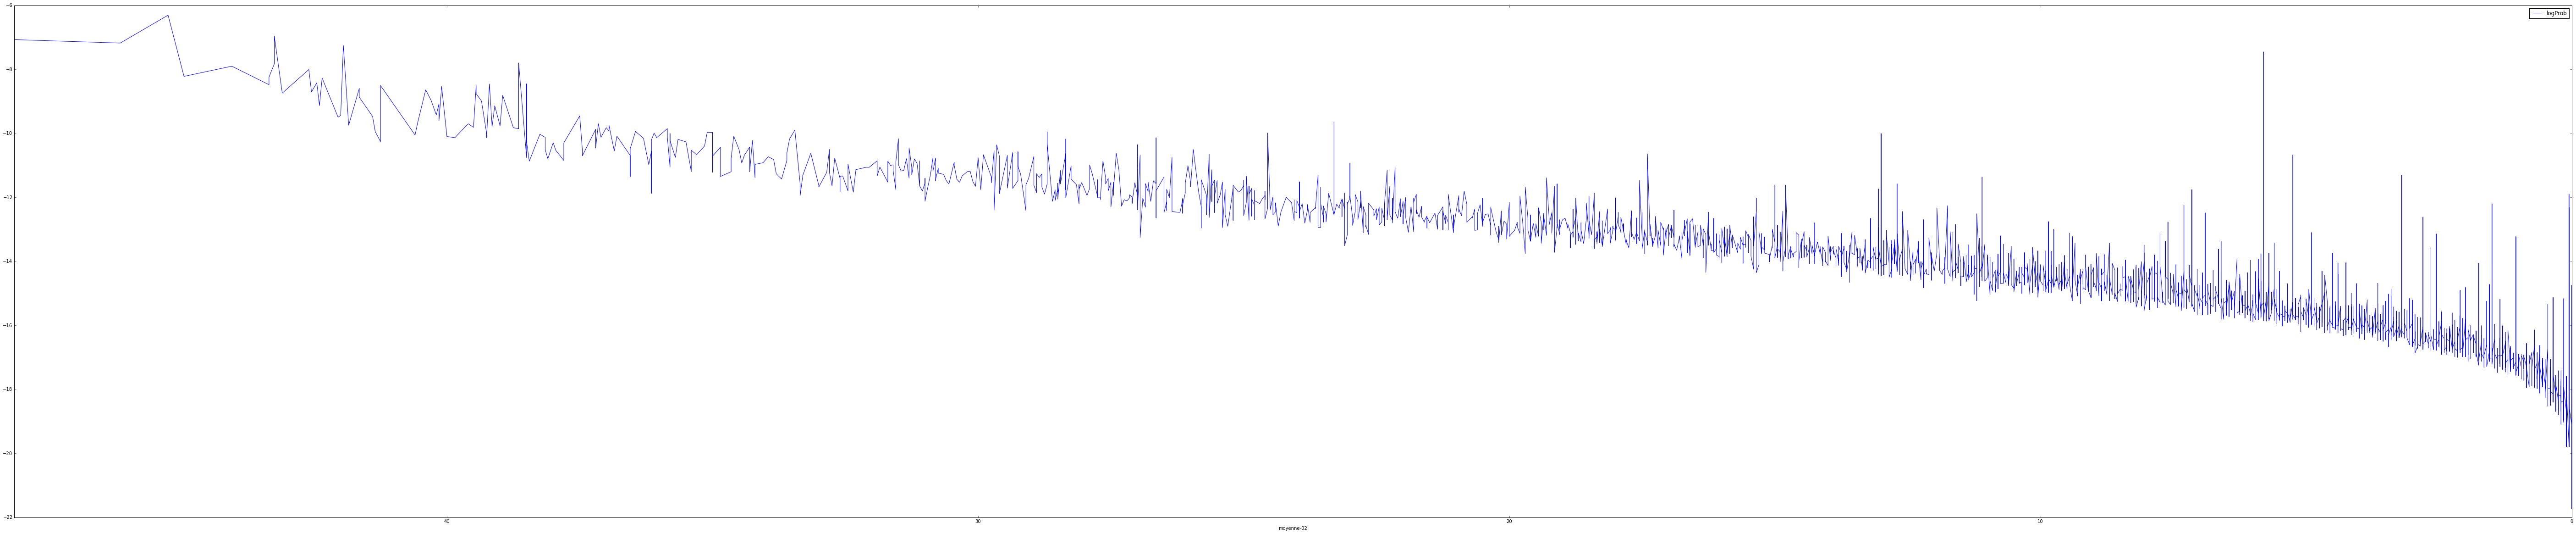

In [217]:
%matplotlib inline
numMoy=2
moyenne="moyenne-%02d"%numMoy
#tab0[["moyenne-00","logProb"]].plot(x="logProb",y="moyenne-00",figsize=(100,20))
moyenneFormes[[moyenne,"logProb"]].sort_values(by="logProb",ascending=False).plot(x="logProb",y=moyenne,figsize=(100,20))
moyenneFormes[[moyenne,"logProb"]].sort_values(by=moyenne,ascending=False).plot(x=moyenne,y="logProb",figsize=(100,20))

In [126]:
nombreFormes[(nombreFormes["moyenne"]>=2) & (nombreFormes["moyenne"]>=nombreFormes["std"])][["lexeme","moyenne","std","prob"]].sort_values(by="prob",ascending=False)

,lexeme,moyenne,std,prob
5005,être,46.25,0.536190,1.828206e-03
1197,dire,44.10,0.700000,9.495843e-04
2140,faire,48.95,0.668954,8.514909e-04
384,avoir,47.15,0.726292,7.642672e-04
169,aller,43.00,0.707107,7.087324e-04
2142,falloir,6.10,0.300000,5.797053e-04
3375,pouvoir,40.10,1.090871,4.114658e-04
4765,vouloir,44.55,0.920598,3.986681e-04
4204,savoir,45.40,0.489898,3.710616e-04
4754,voir,43.45,0.739932,3.342995e-04
